In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [80]:
# create the dataframe 
cws = os.getcwd()
df = pd.read_csv(cws +"/cleaned_BA_reviews.csv", index_col=0)

#  Visualize Rating Distribution 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
rating_counts = df['stars'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Show labels on the bars
for index, value in enumerate(rating_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)

# Save the plot as an image file 
plt.savefig('img/Rating_Distribution.png', bbox_inches='tight')

# Now, display the plot
plt.show()


# Visualize Review Count Over Time

 plot the number of reviews over time. We'll create a line chart for this.

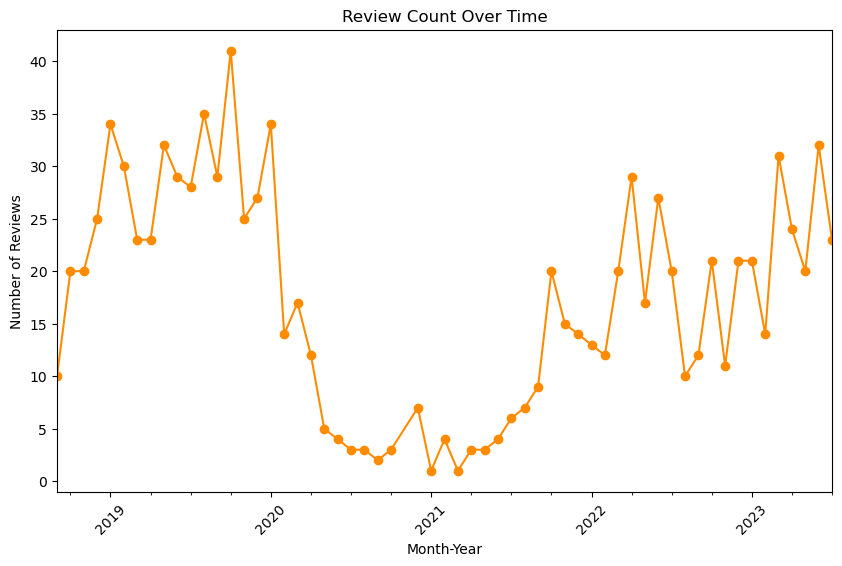

In [82]:
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')

plt.figure(figsize=(10, 6))
df['month_year'].value_counts().sort_index().plot(kind='line', marker='o', color='darkorange')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.title('Review Count Over Time')
plt.xticks(rotation=45)
# Save the plot as an image file 
plt.savefig('img/Review_count_over_time.png', bbox_inches='tight')

# Now, display the plot
plt.show()


let's move on to visualizing the number of reviews by country. We can create a bar chart or a choropleth map to display the distribution of reviews from different countries. For this task, we'll use a bar chart to show the review count for each country.

# Data Preparation
Before creating the bar chart, we need to group the data by country and count the number of reviews for each country. We'll use the groupby function in Pandas to achieve this.

In [83]:
# Count the review occurrences for each country and reset the index to get it as a DataFrame
reviews_by_country = df['country'].value_counts().reset_index()

# Rename the columns to have meaningful names
reviews_by_country.columns = ['Country', 'Review Count']

# Print the first few rows of the DataFrame
print(reviews_by_country.head())

# To get the total number of countries involved, We can use the following:
total_countries_involved = reviews_by_country.shape[0]
print("Total countries involved:", total_countries_involved)


          Country  Review Count
0  United Kingdom           567
1   United States           163
2       Australia            34
3          Canada            32
4    South Africa            19
Total countries involved: 55


# Visualization
Now, let's plot the number of reviews for each country using a bar chart.

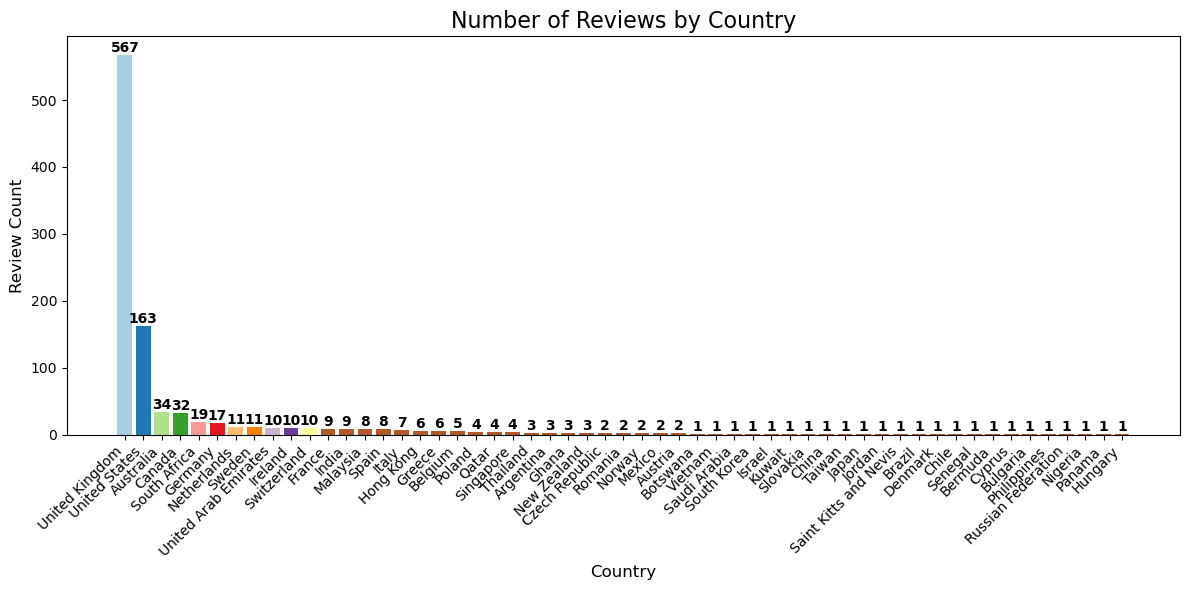

In [84]:
plt.figure(figsize=(12, 6))
colors = plt.cm.Paired(range(len(reviews_by_country)))
plt.bar(reviews_by_country['Country'], reviews_by_country['Review Count'], color=colors)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Number of Reviews by Country', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add annotations on top of the bars
for i, count in enumerate(reviews_by_country['Review Count']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
# Save the plot as an image file 
plt.savefig('img/Number_of_review_by_country.png', bbox_inches='tight')

# Now, display the plot
plt.show()


# Top Positive & Negative Keyword
To find the top positive and negative keywords from the reviews, we need to perform text analysis on the review text. We can use natural language processing (NLP) techniques to extract important words from the text and then calculate their frequency.

In [85]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in word_tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Apply text preprocessing to the reviews
df['processed_reviews'] = df['reviews'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
# Combine all processed reviews into a single list
all_words = [word for review in df['processed_reviews'] for word in review]

# Count the occurrences of each word
word_freq = Counter(all_words)


In [87]:
# Define the number of top positive and negative keywords to extract
num_top_keywords = 10

# Extract top positive keywords
top_positive_keywords = word_freq.most_common(num_top_keywords)

# To get top negative keywords, we can use the `most_common` method with a negative value for the threshold
top_negative_keywords = word_freq.most_common(-num_top_keywords)

print("Top Positive Keywords:")
print(top_positive_keywords)

print("\nTop Negative Keywords:")
print(top_negative_keywords)


Top Positive Keywords:
[('flight', 1831), ('ba', 1125), ('service', 709), ('london', 594), ('seat', 502), ('time', 473), ('food', 460), ('crew', 452), ('one', 423), ('seats', 414)]

Top Negative Keywords:
[]


# visualization top positive keyword using barplot

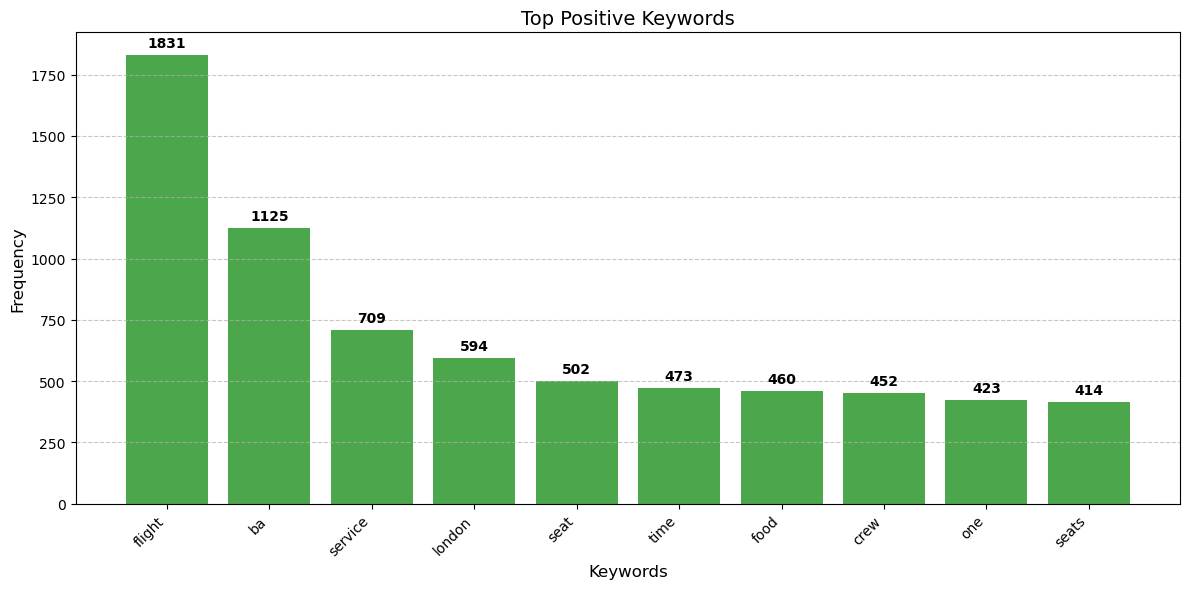

In [88]:
import matplotlib.pyplot as plt

# Provided top positive keywords
top_positive_keywords = [('flight', 1831), ('ba', 1125), ('service', 709), ('london', 594), ('seat', 502), ('time', 473), ('food', 460), ('crew', 452), ('one', 423), ('seats', 414)]

# Visualization for top positive keywords
plt.figure(figsize=(12, 6))
bars = plt.bar([kw[0] for kw in top_positive_keywords], [kw[1] for kw in top_positive_keywords], color='green', alpha=0.7)

# Add text annotations above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Positive Keywords', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the plot as an image file 
plt.savefig('img/Top_positive_keywords.png', bbox_inches='tight')

# Now, display the plot
plt.show()


# Average Rating by Country
choropleth map to show the average rating for each country. This can provide insights into how customers from different countries perceive the airline.

In [89]:

import pandas as pd
import plotly.graph_objects as go

# Check the columns in your DataFrame
print(df.columns)

# Set the 'country' column as the index
df.set_index('country', inplace=True)

# Group the DataFrame by 'country' and calculate the mean of 'stars' for each group
average_rating_by_country = df.groupby(df.index)['stars'].mean().reset_index()

# Sort the data in descending order based on the average rating
average_rating_by_country = average_rating_by_country.sort_values(by='stars', ascending=False)

# Print the top 10 countries with the highest average ratings
print(average_rating_by_country.head(10))


Index(['index', 'reviews', 'date', 'country', 'stars', 'verified',
       'month_year', 'processed_reviews'],
      dtype='object')
               country  stars
6               Brazil  10.00
25              Jordan  10.00
40        Saudi Arabia   9.00
9                Chile   8.00
45         South Korea   8.00
48         Switzerland   6.70
34         Philippines   6.00
2              Austria   6.00
38  Russian Federation   6.00
35              Poland   5.75


C:\Users\USER\anaconda3\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `img/Average_Rating_by_country.png` didn't end with .html. Adding .html to the end of your file.



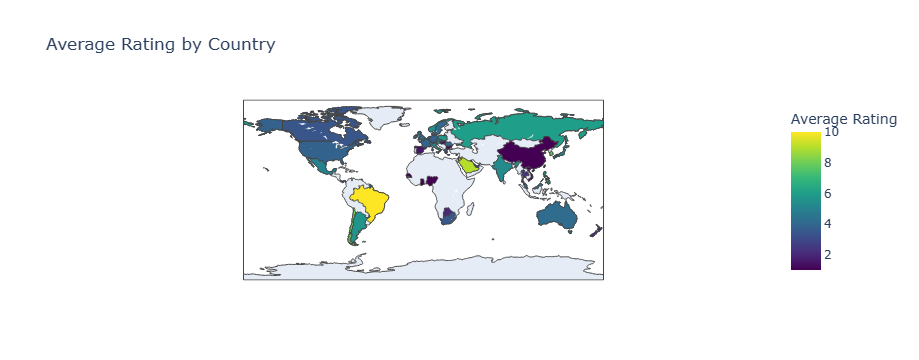

In [90]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Assuming you have already created the 'average_rating_by_country' DataFrame

# Create the choropleth map
plot = go.Figure(data=go.Choropleth(
    locations=average_rating_by_country['country'],  # Country names
    z=average_rating_by_country['stars'],  # Average rating values
    locationmode='country names',
    colorscale='Viridis',  # Choose a colorscale (you can use other colorscales)
    colorbar_title='Average Rating',
    hovertext=average_rating_by_country['stars'].round(2).astype(str),  # Hover text for each country
    text=average_rating_by_country['country']  # Country names to display on the map
))

# Update the layout of the map
plot.update_layout(
    title_text='Average Rating by Country',
    geo=dict(
        showcoastlines=True,  # Show country coastlines
        showland=True,  # Show land boundaries
        projection_type='equirectangular',  # Choose a projection type (you can use other projections)
    )
)

# Save the plot as an image file 
plot_filename = 'img/Average_Rating_by_country.png'
pyo.plot(plot, filename=plot_filename, auto_open=False)

# Display the choropleth map
plot.show()


# Most Frequent Complaints
Identify the most common complaints from the review text and visualize them using a bar chart. This can give you an idea of the main pain points for customers.

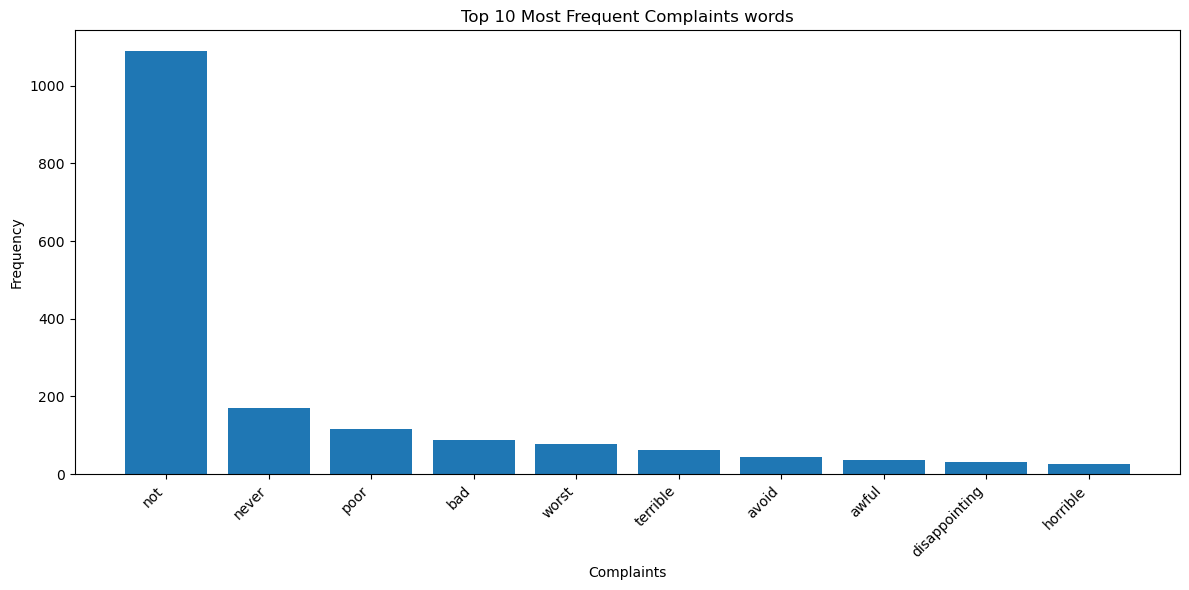

In [91]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can read your dataset using pd.read_csv('your_dataset.csv')

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'reviews' column to get the bag-of-words representation
X = vectorizer.fit_transform(df['reviews'])

# Get the feature names (i.e., words or phrases) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Calculate the sum of each word or phrase across all reviews
word_counts = X.sum(axis=0).A1

# Create a dictionary to store the word counts
word_count_dict = dict(zip(feature_names, word_counts))

# Define a list of negative sentiment words and phrases
negative_sentiments = ['bad', 'terrible', 'worst', 'horrible', 'poor', 'awful', 'disappointing', 'not', 'never', 'avoid']

# Find the top 10 most frequent complaints (negative sentiment words)
most_common_complaints = [(word, count) for word, count in word_count_dict.items() if word in negative_sentiments]

# Sort the complaints based on frequency in descending order
most_common_complaints.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 complaints and their frequencies
top_complaints, frequencies = zip(*most_common_complaints[:10])

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_complaints, frequencies)
plt.xlabel('Complaints')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Complaints words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the plot as an image file 
plt.savefig('img/Most_fr_com_word.png', bbox_inches='tight')

# Now, display the plot
plt.show()



# Sentiment Analysis

In [92]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can read your dataset using pd.read_csv('your_dataset.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score from VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the 'reviews' column and store the scores in a new column
df['sentiment_score'] = df['reviews'].apply(get_sentiment_score)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


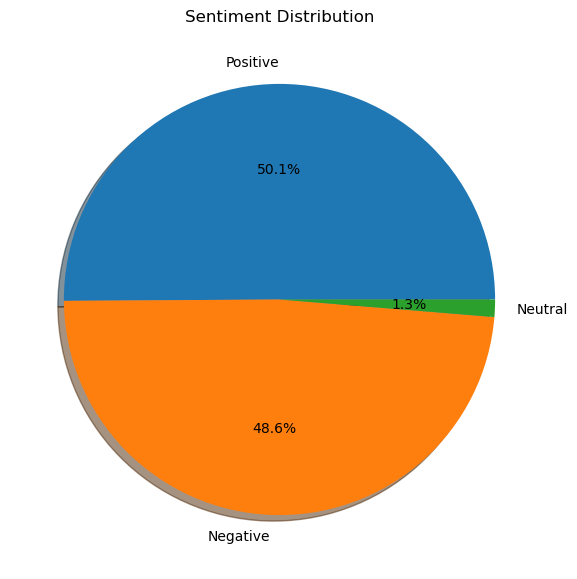

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can read your dataset using pd.read_csv('your_dataset.csv')

# Let's create a new column 'sentiment_category' to categorize sentiments as positive, negative, or neutral
df['sentiment_category'] = df['sentiment_score'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Calculate the counts for each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.title("Sentiment Distribution")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True)
# Save the plot as an image file 
plt.savefig('img/Sentimental_distribution.png', bbox_inches='tight')

# Now, display the plot
plt.show()



# World Association
Word association is important for understanding relationships, sentiment analysis, language patterns, and uncovering hidden meanings in text data.

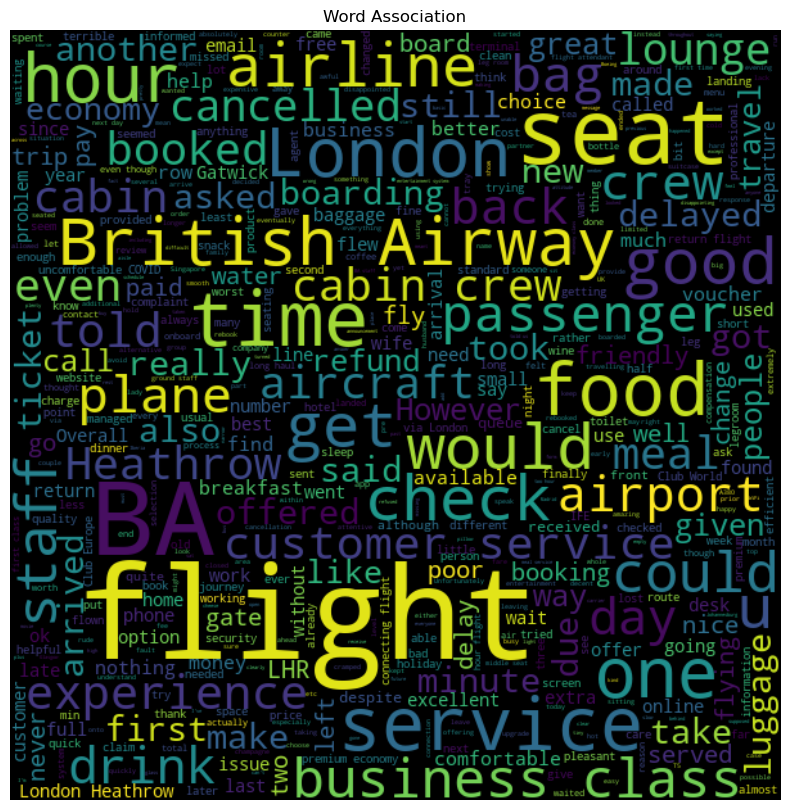

In [94]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Start with one review:
reviews = " ".join(df['reviews'])

plt.figure(figsize=(20, 10))

# Use nltk.corpus.stopwords instead of importing 'stopwords' module
stop_words = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Association")
# Save the plot as an image file 
plt.savefig('img/Words_Assocation.png', bbox_inches='tight')

# Now, display the plot
plt.show()
          


# Average overall rating given for British Airways

# Average Overall Rating

In [95]:
df.stars.mean()


4.014

In [ ]:
from PIL import Image, ImageDraw, ImageFont

mean_value = 4.014

# Create an image with a white background
image = Image.new("RGB", (100, 50), "white")

# Create a drawing context
draw = ImageDraw.Draw(image)

# Set the font and position for the text
font = ImageFont.load_default()
position = (10, 10)

# Convert the mean value to a string and draw it on the image
mean_value_str = "{:.3f}".format(mean_value)  # Format the mean value to 3 decimal places
draw.text(position, mean_value_str, fill="black", font=font)
plot.title(avg_mean_rating)
# Save the image as a file
image.save('img/Average_mean.png')

# Now, display the image
image.show()
